# План работы

1. Подготовить данные
2. Провести исследовательский анализ данных
3. Построить и обучить модель
4. Выводы


## Подготовка данных

<div style="border:solid blue 2px; padding: 20px">

Откроем и изучим файл
</div>

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
#pip install -U pandas-profiling[notebook]

In [2]:
#pip install sweetviz

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
#import sweetviz as sv
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

<div style="border:solid blue 2px; padding: 20px">

Откроем и изучим файлы
</div>

In [4]:
# чтение файла с данными и сохранение
# метод try-except поможет загрузить данные локально или глобально
try:
    gold_recovery_train = pd.read_csv('C:/Users/gold_recovery_train_new.csv')  # Локальный путь
    gold_recovery_test = pd.read_csv('C:/Users/gold_recovery_test_new.csv')
    gold_recovery_full = pd.read_csv('C:/Users/gold_recovery_full_new.csv')
except:
    gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')  # Серверный путь
    gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [5]:
# получение первых 5 строк таблицы gold_recovery_full
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
# получение первых 5 строк таблицы gold_recovery_train
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
# получение первых 5 строк таблицы gold_recovery_test
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<div style="border:solid blue 2px; padding: 20px">
    
`test` содержит меньше признаков, чем `full` и `train`
    </div>

<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [8]:
# получение общей информации о данных в таблице gold_recovery_full
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
# получение общей информации о данных в таблице gold_recovery_train
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [10]:
# получение общей информации о данных в таблице gold_recovery_test
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<div style="border:solid blue 2px; padding: 20px">
    
# Расшифруем этапы техпроцесса
   
`rougher` - флотация - **1-й целевой этап**
    
`primary_cleaner` - первая очистка
    
`secondary_cleaner` - вторая очистка    
    
`final` - итог процесса - **итоговый целевой этап**
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
# Расшифруем тип_параметра техпроцесса
    
`input` - на входе сырья
    
`output` - на выходе продукта - **целевой параметр**
    
`state` - характика текущего состояние этапа   
    
`calculation` - расчётные характеристики
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
# Расшифруем название_параметра техпроцесса
    
`recovery` - обогащение (восстановление) - **целевой параметр**
    
`feed_au` - сырьё_золото
    
`feed_pb` - сырьё_свинец
    
`feed_sol` - сырьё_сульфиды
    
`feed_rate` - сырьё_скорость
    
`feed_size` - сырьё_размер
    
`feed_ag` - сырьё_серебро
        
`state` - характика текущего состояние этапа   
    
`calculation` - расчётные характеристики
    
`floatbank` - характеристики флотационной установки  
    
`concentrate` - экспериментальные характеристики

`tail` - отвальные хвосты (отходы и потери сырья)     
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание данных 
    
    
</div> 

In [11]:
# описание данных gold_recovery_full
gold_recovery_full['rougher.input.feed_au'].describe()

count    19439.000000
mean         8.266097
std          1.955092
min          0.010000
25%          6.854384
50%          8.125839
75%          9.769917
max         13.731330
Name: rougher.input.feed_au, dtype: float64

<a id='90%'></a>

In [12]:
# описание данных gold_recovery_full
gold_recovery_full['rougher.output.recovery'].describe()

count    19439.000000
mean        83.328587
std         14.148086
min          0.000000
25%         81.037957
50%         86.188892
75%         90.010670
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [13]:
# описание данных gold_recovery_full
gold_recovery_full['final.output.recovery'].describe()

count    19439.000000
mean        67.050208
std         10.125840
min          0.000000
25%         63.299712
50%         68.172738
75%         72.686642
max        100.000000
Name: final.output.recovery, dtype: float64

In [14]:
# описание данных gold_recovery_train
gold_recovery_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [15]:
# описание данных gold_recovery_train
gold_recovery_train['final.output.recovery'].describe()

count    14149.000000
mean        66.518832
std         10.295402
min          0.000000
25%         62.545817
50%         67.432775
75%         72.346428
max        100.000000
Name: final.output.recovery, dtype: float64

In [16]:
# описание данных gold_recovery_test
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<div style="border:solid blue 2px; padding: 20px">
    
 
`ProfileReport()` применим для исследовательского анализа данных
    
    
</div> 

In [17]:
# презентация результатов анализа gold_recovery_full
#profile_full = ProfileReport(gold_recovery_full, title='gold_recovery_full Pandas Profiling Report', explorative = True)
#profile_full

In [18]:
# презентация результатов анализа gold_recovery_train
#profile_train = ProfileReport(gold_recovery_train, title='gold_recovery_train Pandas Profiling Report', explorative = True)
#profile_train

In [19]:
# презентация результатов анализа gold_recovery_test
#profile_test = ProfileReport(gold_recovery_test, title='gold_recovery_test Pandas Profiling Report', explorative = True)
#profile_test

<div style="border:solid blue 2px; padding: 20px">
    
 
`Sweetviz` применим для исследовательского анализа данных
    
    
</div> 

In [20]:
#report_full = sv.analyze(gold_recovery_full)
#report_full.show_html(filepath='SWEETVIZ_REPORT.html',open_browser=True,layout='widescreen',scale=None)

In [21]:
#report_full.show_notebook()

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">

Данные технологический процесса находятся в трёх файлах
    
- `gold_recovery_full` исходные данные
    
- `gold_recovery_train` обучающая выборка
    
- `gold_recovery_test` тестовая выборка
    
    
**Этапы техпроцесса**
   
`rougher` - флотация - **1-й целевой этап**
    
`primary_cleaner` - первая очистка
    
`secondary_cleaner` - вторая очистка    
    
`final` - итог процесса - **итоговый целевой этап**
    
    
**Тип_параметра техпроцесса**
    
`input` - на входе сырья
    
`output` - на выходе продукта - **целевой параметр**
    
`state` - характика текущего состояние этапа   
    
`calculation` - расчётные характеристики
    
    
**Названия_параметра техпроцесса**
    
`recovery` - обогащение (восстановление) - **целевой параметр**
    
`feed_au` - сырьё_золото
    
`feed_pb` - сырьё_свинец
    
`feed_sol` - сырьё_сульфиды
    
`feed_rate` - сырьё_скорость
    
`feed_size` - сырьё_размер
    
`feed_ag` - сырьё_серебро
        
`state` - характика текущего состояние этапа   
    
`calculation` - расчётные характеристики
    
`floatbank` - характеристики флотационной установки  
    
`concentrate` - экспериментальные характеристики

`tail` - отвальные хвосты (отходы и потери сырья)


Аномалии обнаружены `0` в целевых признаках
    
    
`ProfileReport` или `Sweetviz`применили для исследовательского анализа данных
    
Много признаков с сильной корреляцией и наблюдаем утечку целевого признака в `gold_recovery_train`
    
Отделим признаки необходимые для обучения моделей на этапах `rougher_recovery``final_recovery`
    
`gold_recovery_test` отсутствуют целевые признаки. Добавим из `gold_recovery_full`
    

    

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`MAE` расчитаем на обучающей выборке: согласно описанию техпроцесса
    
- `rougher.output.recovery` значение целевого признака `флотация.на выходе.обогащение`
    
- значение предсказания целевого признака рассчитывается по формуле из условия задачи:
    
  `recovery = (c * (f - t) / f * (c - t)) * 100` 
    
    `c` доля золота в концентрате после флотации/очистки `rougher.output.concentrate_au`
    
    `f` доля золота в сырье/концентрате до флотации/очистки `rougher.input.feed_au`
    
    `t` доля золота в отвальных хвостах после флотации/очистки `rougher.output.tail_au`
    

    
    
</div> 

In [22]:
# MAE между расчётами и значением признака
recovery = ((gold_recovery_train['rougher.output.concentrate_au'] * (gold_recovery_train['rougher.input.feed_au'] - gold_recovery_train['rougher.output.tail_au']))*100)/(gold_recovery_train['rougher.input.feed_au']*(gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['rougher.output.tail_au']))
print('Среднее абсолютное отклонение:', mean_absolute_error(gold_recovery_train['rougher.output.recovery'], recovery))

Среднее абсолютное отклонение: 1.1131451184435918e-14


<div style="border:solid blue 2px; padding: 20px">
    
 
`MAE` между расчётами `recovery` и `rougher.output.recovery` очень маленькое отклонение `1.11e-14`
    
Это подтверждает, что эффективность обогащения рассчитана правильно
    

    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Проанализируем признаки, недоступные в тестовой выборке `gold_recovery_test`<a id='п1.7'></a>
    
Рассмотрим параметры и  к какому типу относятся
    

    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`set()` получим множество с названиями признаков в `gold_recovery_full` и `gold_recovery_test`
    
Разница между ними это множество со всеми элементами, которые содержатся в уменьшаемом
    
    
</div> 

In [23]:
# получение отсутствующих признаков в gold_recovery_test
columns = set(gold_recovery_full.columns) - set(gold_recovery_test.columns)
sorted(columns)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div style="border:solid blue 2px; padding: 20px">
    
В тестовой выборке `gold_recovery_test` 
    
- недоступны признаки онлайн метрик экспериментальных данных
   
`rougher.output.concentrate` `rougher.output.tail` `rougher.output.recovery` - на выходе флотации
    
`primary_cleaner.output.concentrate` `primary_cleaner.output.tail` - на выходе 1-й очистки

`secondary_cleaner.output.tail` - на выходе 2-й очистки    
    
`final.output.concentrate` `final.output.tail` `final.output.recovery` - итоги процесса
    

- содержатся признаки оффлайн метрики исторических данных
    
`state.floatbank`характеризующие текущее состояние этапа
    
`rougher.input.feed`характеризующие сырьё на вход флотации 
    
`primary_cleaner.input.feed_size` характеризующие сырьё на вход 1-й очистки
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Проведём предобработку данных на пропуски

    
</div> 

In [24]:
gold_recovery_full.isna().sum().sort_values(ascending=False).head(50)

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

In [25]:
gold_recovery_train.isna().sum().sort_values(ascending=False).head(50)

secondary_cleaner.output.tail_sol             1605
rougher.state.floatbank10_e_air                436
rougher.input.floatbank11_xanthate             428
primary_cleaner.output.concentrate_sol         286
secondary_cleaner.state.floatbank2_a_air       217
final.output.concentrate_sol                   211
rougher.input.feed_size                        144
primary_cleaner.input.xanthate                 100
rougher.input.feed_pb                          100
final.output.tail_pb                           100
primary_cleaner.output.concentrate_pb           86
rougher.input.feed_sol                          78
primary_cleaner.output.tail_sol                 46
rougher.input.floatbank11_sulfate               36
primary_cleaner.input.depressant                32
rougher.input.floatbank10_sulfate               29
rougher.output.concentrate_sol                  22
secondary_cleaner.state.floatbank2_b_air        21
primary_cleaner.input.sulfate                   20
primary_cleaner.output.tail_pb 

In [26]:
gold_recovery_test.isna().sum().sort_values(ascending=False).head(12)

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
rougher.input.feed_size                      1
dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
По условию соседние по времени параметры часто похожи

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
`ffill()` заменим пропуски на впереди стоящие по времени значения

    
</div> 

In [27]:
# заполнение пропусков предыдущими значениями gold_recovery_train
good_gold_recovery_full = gold_recovery_full.ffill()
good_gold_recovery_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [28]:
# заполнение пропусков предыдущими значениями gold_recovery_train
good_gold_recovery_train = gold_recovery_train.ffill()
good_gold_recovery_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [29]:
# заполнение пропусков предыдущими значениями в gold_recovery_test
good_gold_recovery_test = gold_recovery_test.ffill()
good_gold_recovery_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

<div style="border:solid blue 2px; padding: 20px">
    
Пропуски заполнили на `forward` впереди стоящие по времени значения

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Сохраним в переменную `random_state` значение параметра, чтобы результаты получились одинаковыми
    
    
</div> 

In [30]:
# сохранение параметра
random_state = 1234

<div style="border:solid blue 2px; padding: 20px">
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
    
Данные можно исследовать для дальнейшего анализа.
    
Данные индексируются датой и временем получения информации `date`.
    
Соседние по времени параметры часто похожи.
    
**Категориальный признак** `date`, который по условию задачи 
    
не используются для обучения модели и соответственно будет удалён.
    
Проверили, что эффективность обогащения рассчитана верно
    
Проанализировали признаки, недоступные в тестовой выборке `gold_recovery_test`

**Количественный целевой признак** - `recovery` - задача регрессии
    
Провели предобработку данных на пропуски `ffill()`


</div>

## Анализ данных

<div style="border:solid blue 2px; padding: 20px">
    
Посмотрим, как меняется концентрация металлов `_au`, `_ag`, `_pb` на различных этапах очистки
    
- `rougher.output.concentrate`

- `primary_cleaner.output.concentrate`  
    
- `final.output.concentrate`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Создадим функцию `hist_concentrat()` c параметрами `rougher`, `primary_cleaner`, `final`
    
в теле функции методом `hist()` построим гистограмму для концентрации металла на различных этапах
    
    
</div> 

In [31]:
# функция получения гистограммы изменения концентрации металла
def hist_concentrat(rougher, primary_cleaner, final):
    plt.figure(figsize=[5,5])
    plt.hist(rougher, bins=100, label = 'rougher.output', alpha=.5)
    plt.hist(primary_cleaner, bins=100, label = 'primary_cleaner.output', alpha=.5)
    plt.hist(final, bins=100, label = 'final.output', alpha=.5)
    plt.title('Гистограмма распределения концентрации металла')
    plt.xlabel('Концентрация металла на выходе этапа')
    plt.ylabel('Наблюдения')
    plt.legend(loc='upper left')
    plt.xlim([0, 60])
    plt.ylim([0, 2000])
    plt.show()

<div style="border:solid blue 2px; padding: 20px">
    

    
`_au` построим гистограмму для концентрации металла на различных этапах
    
    
</div> 

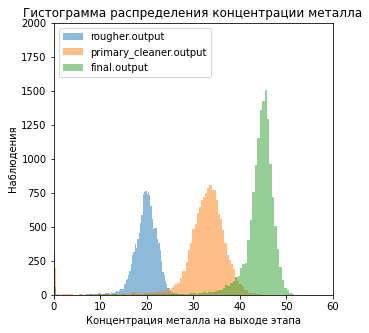

In [32]:
# построение гистограммы для _au
hist_concentrat(good_gold_recovery_train['rougher.output.concentrate_au'], good_gold_recovery_train['primary_cleaner.output.concentrate_au'], good_gold_recovery_train['final.output.concentrate_au'])

<div style="border:solid blue 2px; padding: 20px">
    

    
`_au` концентрации металла **увеличивается** в техпроцессе флотация-очистка-финал
    
Аномалии обнаружены `0` концентрации веществ
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

    
`_ag` построим гистограмму для концентрации металла на различных этапах
    
    
</div> 

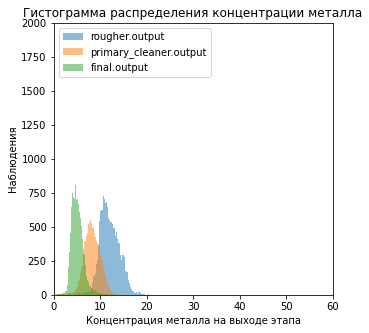

In [33]:
# построение гистограммы для _ag
hist_concentrat(good_gold_recovery_train['rougher.output.concentrate_ag'], good_gold_recovery_train['primary_cleaner.output.concentrate_ag'], good_gold_recovery_train['final.output.concentrate_ag'])

<div style="border:solid blue 2px; padding: 20px">
    

    
`_ag` концентрации металла **уменьшается** в техпроцессе флотация-очистка-финал
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

    
`_pb` построим гистограмму для концентрации металла на различных этапах
    
    
</div> 

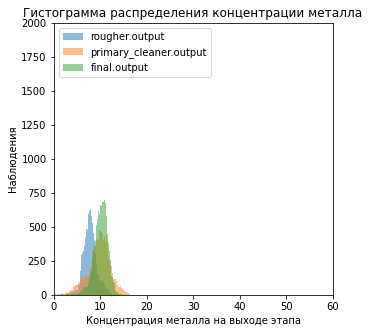

In [34]:
# построение гистограммы для _pb
hist_concentrat(good_gold_recovery_train['rougher.output.concentrate_pb'], good_gold_recovery_train['primary_cleaner.output.concentrate_pb'], good_gold_recovery_train['final.output.concentrate_pb'])

<div style="border:solid blue 2px; padding: 20px">
    

    
`_pb` концентрации металла **увеличивается** в техпроцессе флотация-очистка-финал
    
флотационные реагенты: Xanthate, Sulphate, Depressant связываются с `_pb`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках 
    
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной
    
- `rougher.input.feed_size`
    
- `primary_cleaner.input.feed_size`
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
`hist()` построим гистограмму для размеров гранул сырья 
    
    
</div> 

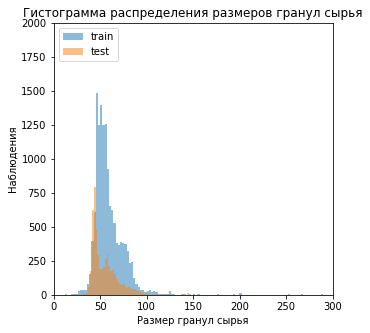

In [35]:
# построение гистограммы для этапа rougher.input
plt.figure(figsize=[5,5])
plt.hist(good_gold_recovery_train['rougher.input.feed_size'], bins=200, label = 'train', alpha=.5)
plt.hist(good_gold_recovery_test['rougher.input.feed_size'], bins=200, label = 'test', alpha=.5)
plt.title('Гистограмма распределения размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Наблюдения')
plt.legend(loc='upper left')
plt.xlim([0, 300])
plt.ylim([0, 2000])
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Для этапа `rougher.input` размеров гранул сырья составляет `40 - 60` в большом количестве
    
Наблюдается смещение влево у распределения на обучающей и тестовой выборках
    
    
</div> 

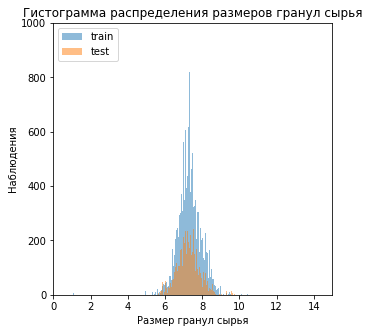

In [36]:
# построение гистограммы для этапа primary_cleaner.input
plt.figure(figsize=[5,5])
plt.hist(good_gold_recovery_train['primary_cleaner.input.feed_size'], bins=200, label = 'train', alpha=.5)
plt.hist(good_gold_recovery_test['primary_cleaner.input.feed_size'], bins=200, label = 'test', alpha=.5)
plt.title('Гистограмма распределения размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Наблюдения')
plt.legend(loc='upper left')
plt.xlim([0, 15])
plt.ylim([0, 1000])
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Для этапа `primary_cleaner.input` размеров гранул сырья составляет `7 - 8` в небольшом количестве
    
Наблюдается нормальное распределения на обучающей и тестовой выборках
    
    
</div> 

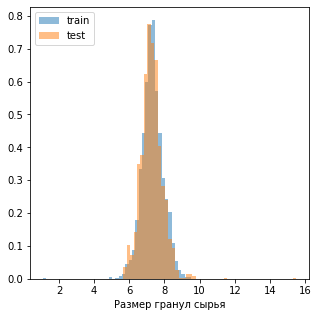

In [37]:
plt.figure(figsize=[5,5])
plt.hist(good_gold_recovery_train['primary_cleaner.input.feed_size'], alpha=.5, bins=50, label='train', density=True)
plt.hist(good_gold_recovery_test['primary_cleaner.input.feed_size'], alpha=.5, bins=50, label='test', density=True)
plt.legend(loc='upper left')
plt.xlabel('Размер гранул сырья') 
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Исследуем суммарную концентрацию `_au`, `_ag`, `_pb`, `_sol` на различных этапах очистки
    
- `rougher.output.concentrate`

- `primary_cleaner.output.concentrate`  
    
- `final.output.concentrate`
    
    
</div> 

In [38]:
# получение суммарной концентрации по этапам rougher, primary_cleaner, final
rougher_output_concentrate_sum_train = (good_gold_recovery_train['rougher.output.concentrate_au'] + good_gold_recovery_train['rougher.output.concentrate_ag'] + good_gold_recovery_train['rougher.output.concentrate_pb'] +good_gold_recovery_train['rougher.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (good_gold_recovery_train['primary_cleaner.output.concentrate_au'] + good_gold_recovery_train['primary_cleaner.output.concentrate_ag'] + good_gold_recovery_train['primary_cleaner.output.concentrate_pb'] +good_gold_recovery_train['primary_cleaner.output.concentrate_sol'])
final_output_concentrate_sum_train = (good_gold_recovery_train['final.output.concentrate_au'] + good_gold_recovery_train['final.output.concentrate_ag'] + good_gold_recovery_train['final.output.concentrate_pb'] + good_gold_recovery_train['final.output.concentrate_sol'])

<div style="border:solid blue 2px; padding: 20px">
    
`hist()` построим гистограмму концентраций
    
    
</div> 

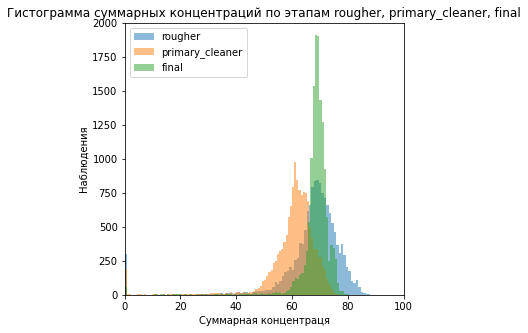

In [39]:
# построение гистограмм
plt.figure(figsize=[5,5])
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner', alpha=.5)
plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final', alpha=.5)
plt.xlim([0, 100])
plt.ylim([0, 2000])
plt.xlabel('Суммарная концентраця')
plt.ylabel('Наблюдения')
plt.legend(loc='upper left')
plt.title('Гистограмма суммарных концентраций по этапам rougher, primary_cleaner, final')
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
`describe()` построим описание данных
    
    
</div> 

In [40]:
# описание данных rougher_output_concentrate_sum_train
rougher_output_concentrate_sum_train.describe()

count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
dtype: float64

In [41]:
# описание данных primary_cleaner_output_concentrate_sum_train
primary_cleaner_output_concentrate_sum_train.describe()

count    14149.000000
mean        60.172546
std         10.448165
min          0.000000
25%         58.046816
50%         61.786946
75%         65.355951
max         76.918076
dtype: float64

In [42]:
# описание данных final_output_concentrate_sum_train
final_output_concentrate_sum_train.describe()

count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
dtype: float64

<div style="border:solid blue 2px; padding: 20px">

    
Аномалии обнаружены `0` концентрации веществ
    
Построим гистограммы для суммарной концентрации в этом масштабе
    
    
</div> 

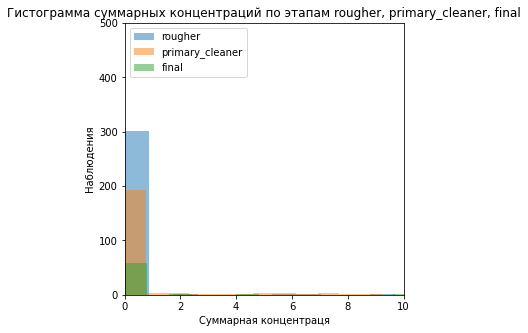

In [43]:
# построение гистограмм
plt.figure(figsize=[5,5])
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner', alpha=.5)
plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final', alpha=.5)
plt.xlim([0, 10])
plt.ylim([0, 500])
plt.xlabel('Суммарная концентраця')
plt.ylabel('Наблюдения')
plt.legend(loc='upper left')
plt.title('Гистограмма суммарных концентраций по этапам rougher, primary_cleaner, final')
plt.show()

In [44]:
# получение строк с аномальными значениями на этапе rougher
good_gold_recovery_train.loc[good_gold_recovery_train['rougher.output.concentrate_au'] < 1]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,5.688961,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,2016-01-17 02:00:00,8.162896,8.877528,5.688961,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10936,2018-03-12 02:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.000000,0.000000,...,22.999183,-503.125579,14.941823,-500.352978,17.987796,-500.438815,11.963555,-499.982857,12.015338,-500.051956
10937,2018-03-12 03:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.000000,0.000000,...,22.985096,-498.720702,14.934058,-499.661417,17.998973,-500.156797,12.035195,-500.141814,11.988525,-500.526074
10938,2018-03-12 04:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.000000,0.000000,...,22.953466,-499.747605,14.926294,-500.058041,18.055831,-500.061594,12.014652,-500.253440,12.003849,-499.838564
10939,2018-03-12 05:59:59,5.413548,9.389648,8.731319,45.270618,100.000000,0.000000,0.000000,0.000000,0.000000,...,22.953502,-502.064254,14.918529,-500.135286,17.995171,-500.481962,11.988193,-500.208854,12.004454,-500.074096


In [45]:
# получение строк с аномальными значениями на этапе primary_cleaner
good_gold_recovery_train.loc[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] <= 1]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
19,2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,...,14.001632,-509.808331,12.087669,-510.782166,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776
22,2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145,...,13.943970,-541.642068,11.993920,-550.493894,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998
30,2016-01-16 06:00:00,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310,...,13.981220,-551.189582,12.004777,-549.974630,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548
71,2016-01-18 01:00:00,4.677499,11.304745,4.655438,45.135616,72.437752,10.525415,1.479372,19.364956,2.215637,...,14.051080,-549.947124,12.071173,-549.799781,10.025142,-499.554142,8.130711,-499.758800,11.951659,-600.726946
74,2016-01-18 04:00:00,4.821388,10.235502,1.581066,43.264258,84.687443,5.520487,0.821232,9.264695,1.263480,...,14.016798,-548.935696,12.029818,-550.966916,10.012719,-501.020322,8.020406,-500.395112,11.995851,-598.774893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,2018-08-10 03:59:59,4.442023,9.238301,8.544080,46.335757,70.786883,15.481737,4.182762,10.009065,3.699811,...,26.932349,-501.069584,23.036534,-499.490454,22.953779,-498.555444,17.997955,-500.101945,23.010025,-517.763087
13964,2018-08-10 04:59:59,4.916341,9.644849,8.945859,44.961086,67.943045,16.154268,4.374716,10.503920,4.018436,...,26.999371,-500.703290,22.944209,-500.369741,23.018333,-499.900014,17.966376,-500.193360,23.000951,-511.958802
13965,2018-08-10 05:59:59,5.134035,9.683889,9.203260,44.519141,72.002510,15.955848,4.365837,10.190798,3.492422,...,27.024196,-500.457349,23.074248,-500.214741,22.885700,-499.773159,17.931386,-500.026603,23.009269,-521.406956
13966,2018-08-10 06:59:59,4.503756,8.387537,7.408152,35.313266,81.349671,9.262237,2.541834,5.580436,1.704367,...,26.972326,-493.765307,22.998882,-499.387153,19.961717,-484.411358,14.988112,-498.198420,22.974569,-504.838074


In [46]:
# получение строк с аномальными значениями на этапе final
good_gold_recovery_train.loc[good_gold_recovery_train['final.output.concentrate_au'] < 1]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
644,2016-02-13 11:00:00,0.00,0.00,0.00,0.00,0.000000,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1193,2016-03-11 10:00:00,0.00,0.00,0.00,0.00,0.000000,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1194,2016-03-11 11:00:00,0.00,0.00,0.00,0.00,0.000000,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1195,2016-03-11 12:00:00,0.00,0.00,0.00,0.00,0.000000,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1196,2016-03-11 13:00:00,0.00,0.00,0.00,0.00,0.000000,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405
1682,2016-04-09 17:00:00,0.00,0.00,0.00,0.00,0.000000,2.943613,1.089791,4.050067,2.443084,...,15.982774,-498.453731,13.963050,-472.304428,12.012947,-498.936345,9.989854,-800.001639,19.960963,-500.498255
2019,2016-05-01 23:59:59,0.00,0.00,0.00,0.00,0.000000,2.229996,0.439314,2.996147,1.049438,...,14.957055,-522.627263,13.060565,-502.673001,8.851882,-503.279765,9.037939,-500.400661,15.999356,-509.449510
2020,2016-05-02 00:59:59,0.00,0.00,0.00,0.00,0.000000,8.816376,1.692314,12.001629,3.949153,...,15.032195,-498.930340,13.051205,-502.405376,8.972976,-498.876974,9.070907,-499.455708,16.026009,-492.939580
2236,2016-05-11 01:59:59,0.00,0.00,0.00,0.00,0.000000,7.567252,1.991327,12.977099,3.170143,...,14.005274,-500.345401,12.087124,-500.180957,11.025995,-501.002632,6.093285,-500.452445,20.023462,-500.365653
3394,2016-07-06 04:59:59,0.00,0.00,0.00,0.00,0.000000,6.266939,2.146631,7.240419,3.552111,...,16.995498,-500.641429,15.009792,-499.990413,16.993432,-501.022669,14.951274,-499.908216,24.984095,-499.000500


<div style="border:solid blue 2px; padding: 20px">
    
`drop()` удалим аномальные значения по одному признаку в этапе, потому что все остальные аномалии
    
находятся в тех же индексах
    
 
    
</div> 

In [47]:
# удаление аномальных значений
good_gold_recovery_train.drop(index = good_gold_recovery_train[good_gold_recovery_train['rougher.output.concentrate_au'] < 1].index, axis=0, inplace=True)
good_gold_recovery_train.drop(index = good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] < 1].index, axis=0, inplace=True)
good_gold_recovery_train.drop(index = good_gold_recovery_train[good_gold_recovery_train['final.output.concentrate_au'] < 1].index, axis=0, inplace=True)

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Концентрация металлов `_au`, `_ag`, `_pb` на этапах очистки меняется в соответствие с техпроцессом
    
- `rougher.output.concentrate`

- `primary_cleaner.output.concentrate`  
    
- `final.output.concentrate`
    
Размеры гранул сырья на обучающей и тестовой выборках не имеют значительных отличий
    
Обнаружены аномальные значения в суммарных концентрациях всех веществ на разных стадиях
    
Наблюдения близкие или равные `0` нулю, скорее всего это связано 
    
со сбоем измерительного оборудования, `0` нулевые значения исключили из данных.
    

    
</div> 

## Модель

<div style="border:solid blue 2px; padding: 20px">
    
По условию прототип модели ML должен предсказать восстановление золота из руды
    
- `rougher.output.recovery` 
    
- `final.output.recovery`
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
`rougher_recovery` отберём актуальные признаки по которым будет обучаться модель предсказания
    
`rougher.output.recovery`
    
    
    
</div> 

In [48]:
# признаки rougher из good_gold_recovery_train
rougher_recovery = good_gold_recovery_train.loc[ :,good_gold_recovery_train.columns.str.startswith('rougher')]

<div style="border:solid blue 2px; padding: 20px">
    
    
Проверим нет ли в них утечки целевого признака `target leakage`

</div> 

In [49]:
# получение признаков
rougher_target_leakage = set(rougher_recovery.columns) - set(good_gold_recovery_test.columns)
rougher_target_leakage.remove('rougher.output.recovery')
sorted(rougher_target_leakage)

['rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol']

<div style="border:solid blue 2px; padding: 20px">
    
    
В данном случае использовать отсутствующие в тесте признаки нецелесообразно, 

потому что будет утечка целевого признака, т.к. в них содержаться сами целевые признаки 

и признаки которые могут сильно на них влиять. 

Но эти признаки не доступны на этапе прогнозирования, то есть в начале процесса. 

Если при предсказании подать модели набор признаков отличающийся от тех что были на обучении,

то будет ошибка.

</div> 

In [50]:
# удаление признаков из обучающей выбороки
rougher_recovery = rougher_recovery.drop(columns=rougher_target_leakage)
rougher_recovery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13595 entries, 0 to 14148
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_ag               13595 non-null  float64
 1   rougher.input.feed_pb               13595 non-null  float64
 2   rougher.input.feed_rate             13595 non-null  float64
 3   rougher.input.feed_size             13595 non-null  float64
 4   rougher.input.feed_sol              13595 non-null  float64
 5   rougher.input.feed_au               13595 non-null  float64
 6   rougher.input.floatbank10_sulfate   13595 non-null  float64
 7   rougher.input.floatbank10_xanthate  13595 non-null  float64
 8   rougher.input.floatbank11_sulfate   13595 non-null  float64
 9   rougher.input.floatbank11_xanthate  13595 non-null  float64
 10  rougher.output.recovery             13595 non-null  float64
 11  rougher.state.floatbank10_a_air     13595

<div style="border:solid blue 2px; padding: 20px">
    
    
Признаки `rougher_recovery` сохраним в отдельных переменных 
    
    
- `features_rougher_recovery`
    
    
- `target_rougher_recovery` - целевой признак

</div> 

In [51]:
# сохранение признаков rougher_recovery в отдельных переменных
features_rougher_recovery = rougher_recovery.drop(columns=['rougher.output.recovery'])
target_rougher_recovery = rougher_recovery['rougher.output.recovery']

<div style="border:solid blue 2px; padding: 20px">
    
`final_recovery` отберём актуальные признаки по которым будет обучаться модель предсказания
    
`final.output.recovery`, т.е. берём все признаки обучающей выборки
    
    
    
</div> 

In [52]:
# признаки final из good_gold_recovery_train
final_recovery = good_gold_recovery_train

<div style="border:solid blue 2px; padding: 20px">
    
    
Утечку целевого признака `target leakage` [находили выше п1.7](#п1.7)

</div> 

In [53]:
# получение признаков
final_target_leakage = set(final_recovery.columns) - set(good_gold_recovery_test.columns)
final_target_leakage.remove('final.output.recovery')
sorted(final_target_leakage)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.t

In [54]:
# удаление признаков из обучающей выбороки
final_recovery = final_recovery.drop(columns=final_target_leakage)
final_recovery = final_recovery.drop(columns='date')
final_recovery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13595 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13595 non-null  float64
 1   primary_cleaner.input.sulfate               13595 non-null  float64
 2   primary_cleaner.input.depressant            13595 non-null  float64
 3   primary_cleaner.input.feed_size             13595 non-null  float64
 4   primary_cleaner.input.xanthate              13595 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13595 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13595 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13595 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13595 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13595 non-null  float64
 10  primary_cl

<div style="border:solid blue 2px; padding: 20px">
    
    
Признаки `final_recovery` сохраним в отдельных переменных 
    
    
- `features_final_recovery`
    
    
- `target_final_recovery` - целевой признак

</div> 

In [55]:
# сохранение признаков final_recovery в отдельных переменных
features_final_recovery = final_recovery.drop(columns=['final.output.recovery'])
target_final_recovery = final_recovery['final.output.recovery']

<div style="border:solid blue 2px; padding: 20px">
    
`rougher_output_recovery` `final_output_recovery` добавим целевые признаки из `gold_recovery_full`
    
    
</div> 

In [56]:
# добавляем в test целеыве признаки из gold_recovery_full
good_gold_recovery_test = good_gold_recovery_test.set_index([good_gold_recovery_test['date']]) 
good_gold_recovery_test['rougher.output.recovery'] = gold_recovery_full.set_index([gold_recovery_full['date']])['rougher.output.recovery']
good_gold_recovery_test['final.output.recovery'] = gold_recovery_full.set_index([gold_recovery_full['date']])['final.output.recovery']

In [57]:
# признаки final из good_gold_recovery_test
test_target_final_recovery = good_gold_recovery_test['final.output.recovery']
test_target_final_recovery.shape

(5290,)

In [58]:
# признаки final из good_gold_recovery_test
test_features_final_recovery = good_gold_recovery_test.drop(columns=['date','final.output.recovery','rougher.output.recovery'])
test_features_final_recovery.shape

(5290, 52)

In [59]:
# признаки этапа final_recovery
columns_final_recovery = set(test_features_final_recovery.columns) - set(features_rougher_recovery.columns)

In [60]:
# признаки rougher из good_gold_recovery_test
test_features_rougher_recovery = test_features_final_recovery.drop(columns=columns_final_recovery)
test_features_rougher_recovery.shape

(5290, 22)

In [61]:
# признаки rougher из good_gold_recovery_test
test_target_rougher_recovery = good_gold_recovery_test['rougher.output.recovery']
test_target_rougher_recovery.shape

(5290,)

<div style="border:solid blue 2px; padding: 20px">
    
Введём новую метрику качества — `Symmetric Mean Absolute Percentage Error` 
    
симметричное среднее абсолютное процентное отклонение
    
Она похожа на `MAE`, но выражается не в абсолютных величинах, а в относительных. 
    
Cимметричная, т.к. она одинаково учитывает масштаб и целевого признака, и предсказания
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Создадим функцию `sMAPE()` c параметрами
    
- `_answer` значение целевого признака для объекта в выборке, на которой измеряется качество 
    
- `_prediction` значение предсказания для объекта в выборке, на которой измеряется качество
    
в теле функции рассчитываем количество объектов в выборке `n` и 
    
эффективность обогащения чернового `25%`
    
и финального концентрата `75%`
    

    
</div> 

<a id='бейзлайн'></a>

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
def sMAPE(y_test, y_pred):
    n = y_test.shape[0]
    return ((2*abs(y_test - y_pred)/(abs(y_test) + abs(y_pred))).sum() * 100 / n)

In [66]:
def total_sMAPE(rougher_sMAPE,final_sMAPE):
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

<div style="border:solid blue 2px; padding: 20px">
    
    
Посчитаем `sMAPE()` для константной модели на медианных значениях 
    
`rougher.output.recovery` `final.output.recovery`
    
</div> 

In [67]:
# подсчёт sMAPE константной модели
constant_rougher_sMAPE = sMAPE(rougher_recovery['rougher.output.recovery'], rougher_recovery['rougher.output.recovery'].median())
constant_final_sMAPE = sMAPE(final_recovery['final.output.recovery'], final_recovery['final.output.recovery'].median())
print('total_sMAPE константной модели:', total_sMAPE(constant_rougher_sMAPE,constant_final_sMAPE))

total_sMAPE константной модели: 9.338500682781637


In [68]:
scorer = make_scorer(sMAPE,greater_is_better=False)

<div style="border:solid blue 2px; padding: 20px">
    
    
Обучим разные модели для **количественного целевого признака** - `recovery` - задача регрессии

</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`total_sMAPE()` расчёт для модели `DecisionTreeRegressor`

    
    
</div> 

In [69]:
tree = DecisionTreeRegressor()

In [70]:
parametrs_dtr = {'max_depth': range(1,10)}

In [71]:
%%time

rougher = GridSearchCV(tree, parametrs_dtr,scoring=scorer, cv=5)
rougher.fit(features_rougher_recovery, target_rougher_recovery)
print('Модель', rougher.best_estimator_)
print('Оценка "rougher_sMAPE"', rougher.best_score_)

Модель DecisionTreeRegressor(max_depth=6)
Оценка "rougher_sMAPE" -6.943420038330563
CPU times: user 7.04 s, sys: 0 ns, total: 7.04 s
Wall time: 7.04 s


In [72]:
%%time

final = GridSearchCV(tree, parametrs_dtr,scoring=scorer, cv=5)
final.fit(features_final_recovery, target_final_recovery)
print('Модель', final.best_estimator_)
print('Оценка "final_sMAPE"', final.best_score_)

Модель DecisionTreeRegressor(max_depth=3)
Оценка "final_sMAPE" -9.237034491615805
CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.3 s


In [73]:
total_sMAPE(rougher.best_score_,final.best_score_)

-8.663630878294494

<div style="border:solid blue 2px; padding: 20px">
    
 
`total_sMAPE()` расчёт для модели `RandomForestRegressor`

    
    
</div> 

In [74]:
forest = RandomForestRegressor()

In [75]:
parametrs_rfr = {'n_estimators': range (10,15),'max_depth': range (1,10, 2)}#,'min_samples_leaf': range (1,10),'min_samples_split': range (2,10,2)}

In [76]:
%%time

rougher = GridSearchCV(forest, parametrs_rfr,scoring=scorer, cv=5)
rougher.fit(features_rougher_recovery, target_rougher_recovery)
print('Модель', rougher.best_estimator_)
print('Оценка "rougher_sMAPE"', rougher.best_score_)

Модель RandomForestRegressor(max_depth=5, n_estimators=11)
Оценка "rougher_sMAPE" -6.5093855055529435
CPU times: user 1min 37s, sys: 115 ms, total: 1min 37s
Wall time: 1min 39s


In [77]:
%%time

final = GridSearchCV(forest, parametrs_rfr,scoring=scorer, cv=5)
final.fit(features_final_recovery, target_final_recovery)
print('Модель', final.best_estimator_)
print('Оценка "rougher_sMAPE"', final.best_score_)

Модель RandomForestRegressor(max_depth=3, n_estimators=11)
Оценка "rougher_sMAPE" -8.938002300071208
CPU times: user 3min 41s, sys: 123 ms, total: 3min 41s
Wall time: 3min 45s


In [78]:
total_sMAPE(rougher.best_score_,final.best_score_)

-8.330848101441642

<div style="border:solid blue 2px; padding: 20px">
    
 
`total_sMAPE()` расчёт для модели `LinearRegression`

    
    
</div> 

In [79]:
model_lr = LinearRegression()

In [80]:
parametrs_lr = {}

In [81]:
%%time

rougher = GridSearchCV(model_lr, parametrs_lr,scoring=scorer, cv=5)
rougher.fit(features_rougher_recovery, target_rougher_recovery)
print('Модель', rougher.best_estimator_)
print('Оценка "rougher_sMAPE"', rougher.best_score_)

Модель LinearRegression()
Оценка "rougher_sMAPE" -6.671099589842845
CPU times: user 483 ms, sys: 537 ms, total: 1.02 s
Wall time: 1e+03 ms


In [82]:
%%time

final = GridSearchCV(model_lr, parametrs_lr,scoring=scorer, cv=5)
final.fit(features_final_recovery, target_final_recovery)
print('Модель', final.best_estimator_)
print('Оценка "rougher_sMAPE"', final.best_score_)

Модель LinearRegression()
Оценка "rougher_sMAPE" -11.015430018445096
CPU times: user 1.07 s, sys: 994 ms, total: 2.06 s
Wall time: 2.09 s


In [83]:
total_sMAPE(rougher.best_score_,final.best_score_)

-9.929347411294534

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`sMAPE()` для модели `RandomForestRegressor` на обучающей выборке немного лучше чем у константной 
    
    
- `train_constant_model` - `9.338`
    
    
- `DecisionTreeRegressor` - `8.666`
    
    
- `RandomForestRegressor` - `8.362`
    
    
- `LinearRegression` - `9.929`

    
    
</div> 

In [102]:
from sklearn.dummy import DummyRegressor

In [103]:
dummy_rougher = DummyRegressor(strategy="median")
dummy_rougher.fit(features_rougher_recovery, target_rougher_recovery)
dummy_rougher_prediction = dummy_rougher.predict(test_features_rougher_recovery)
dummy_final = DummyRegressor(strategy="median")
dummy_final.fit(features_final_recovery, target_final_recovery)
dummy_final_prediction = dummy_final.predict(test_features_final_recovery)
total_sMAPE(sMAPE(test_target_rougher_recovery,dummy_rougher_prediction),sMAPE(test_target_final_recovery,dummy_final_prediction))

9.450411787424988

In [104]:
# подсчёт test_sMAPE модели DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=6, random_state=random_state)
model_dtr.fit(features_rougher_recovery, target_rougher_recovery)
test_rougher_recovery_prediction = model_dtr.predict(test_features_rougher_recovery)
model_dtr.fit(features_final_recovery, target_final_recovery)
test_final_recovery_prediction = model_dtr.predict(test_features_final_recovery)
test_smape_model_dtr = total_sMAPE(sMAPE(test_target_rougher_recovery, test_rougher_recovery_prediction),sMAPE(test_target_final_recovery,test_final_recovery_prediction))
print('test_sMAPE модели DecisionTreeRegressor:', test_smape_model_dtr)

test_sMAPE модели DecisionTreeRegressor: 10.15290081521923


In [105]:
# подсчёт test_sMAPE модели RandomForestRegressor
model_rfr = RandomForestRegressor(max_depth=5, n_estimators=13, random_state=random_state)
model_rfr.fit(features_rougher_recovery, target_rougher_recovery)
test_rougher_recovery_prediction = model_rfr.predict(test_features_rougher_recovery)
model_rfr.fit(features_final_recovery, target_final_recovery)
test_final_recovery_prediction = model_rfr.predict(test_features_final_recovery)
test_smape_model_rfr = total_sMAPE(sMAPE(test_target_rougher_recovery, test_rougher_recovery_prediction),sMAPE(test_target_final_recovery,test_final_recovery_prediction))
print('test_sMAPE модели RandomForestRegressor:', test_smape_model_rfr)

test_sMAPE модели RandomForestRegressor: 9.640739690405976


In [106]:
# подсчёт test_sMAPE модели LinearRegression
model_lr = LinearRegression()
model_lr.fit(features_rougher_recovery, target_rougher_recovery)
test_rougher_recovery_prediction = model_lr.predict(test_features_rougher_recovery)
model_lr.fit(features_final_recovery, target_final_recovery)
test_final_recovery_prediction = model_lr.predict(test_features_final_recovery)
test_smape_model_lr = total_sMAPE(sMAPE(test_target_rougher_recovery, test_rougher_recovery_prediction),sMAPE(test_target_final_recovery,test_final_recovery_prediction))
print('test_sMAPE модели LinearRegression:', test_smape_model_lr)

test_sMAPE модели LinearRegression: 9.256679043877455


<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`sMAPE()` для моделей на тестовой выборке не сильно отличаются от константной модели
    
    
- `DummyRegressor` - `9.450`
    
    
- `DecisionTreeRegressor` - `10.152`
    
    
- `RandomForestRegressor` - `9.640`
    
    
- `LinearRegression` - `9.256` - лучшая модель на тестовой выборке

    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">

## Итоговый вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Золото в природе чаще всего встречается в виде самородного металла и минералов, содержащих золото.
    
Большая часть добываемых в настоящее время золотосодержащих руд относится к сульфидному типу руд.
    
Сульфидные руды и извлечение мелкого золота в настоящее время успешно обогащаются флотацией.
    
Флотация обеспечивает извлечение золота [не менее 80-90 %](#90%)
    
Компании разрабатывают решения для повышения эффективности работы предприятия и разрабатывают 
    
модели, которые предсказывают коэффициент восстановления золота из золотосодержащей руды
    
Модель оптимизирует производство, чтобы не запускать предприятие с убыточными характеристиками
    

**Предлагаемый нами прототип модели** 
    
предсказывает коэффициент восстановления золота из руды на параметрах добычи и очистки
    
    
`sMAPE` для модели `LinearRegression` - `9.256` на тестовой выборке
    


    
    
</div> 